## Framing our problem

i. Our exact objective is to come up with a better way of predicting estimated prices of houses in california. Our estimates of the median house prices will help a real estate manager/developer solve their business problem. 

ii.In our analysis: we shall discover more about the data and visualize it to get insights, prepare it to machine learning algorithms, pick a model to train it based on our data, optimize the model and then present our solution.



### The current solutions

1. Current solutions are based on complex estimates that are hard to keep track of and vary across regions within a short time. Some of these estimate methods cannot be relied upon. 

2. We can therefore offer solutions based on a machine learning technique that can be used to predict other cases.

#### Our solution

Our solution will use a supervised machine learning model of which it will be a regression task with batch learning. 

Since we are dealing with labeled training example to predict the median house price, we shall be using a supervised machine learning with a regression method (multivariate since we have several features to make predictions with). And since there is no continous flow of data and the data can fit into memory, we shall be using a batch technique <a href="https://vitalflux.com/difference-between-online-batch-learning/">Batch and online learning.</a>. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
#import cufflinks as cf

In [3]:
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

NameError: name 'cf' is not defined

In [4]:
california_prices_df = pd.read_csv("./Carlifonia_census_data (1).csv")
california_prices_df.head(10)

longitude  latitude  housing_median_age total_rooms  total_bedrooms  \
0    -122.23     37.88                  41         880           129.0   
1    -122.22     37.86                  21        7099          1106.0   
2    -122.24     37.85                  52        1467           190.0   
3    -122.25     37.85                  52        1274           235.0   
4    -122.25     37.85                  52        1627           280.0   
5    -122.25     37.85                  52         919           213.0   
6    -122.25     37.84                  52        2535           489.0   
7    -122.25     37.84                  52        3104           687.0   
8    -122.26     37.84                  42        2555           665.0   
9    -122.25     37.84                  52        3549           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  
5         413         193         4.0368              269700        NEAR BAY  
6        1094         514         3.6591              299200        NEAR BAY  
7        1157         647         3.1200              241400        NEAR BAY  
8        1206         595         2.0804              226700        NEAR BAY  
9        1551         714         3.6912              261100        NEAR BAY

In [5]:
california_prices_df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile = california_prices_df.profile_report(title='Pandas Profiling Report')  
profile.to_file(output_file="Carlifonia_census_data (1).html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
california_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


value_counts() function returns object containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [8]:
california_prices_df["ocean_proximity"].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

 We are going to change the total bedrooms to numerical 

While doing this: I encountered a pandas gotcha(In DS Caveats means warning and gotcha means an unseen problem):)

The loc property is used to access a group of rows and columns by label(s) or a boolean array. . loc[] is primarily label based, but may also be used with a boolean array.

In [9]:
california_prices_df.loc[california_prices_df["total_rooms"] == '??']

longitude  latitude  housing_median_age total_rooms  total_bedrooms  \
10       -122.26     37.85                  52          ??           434.0   
29       -122.28     37.84                  52          ??           160.0   
42       -122.26     37.84                  49          ??           202.0   
58       -122.28     37.82                  52          ??           341.0   
72       -122.29     37.81                  49          ??           204.0   
...          ...       ...                 ...         ...             ...   
20552    -121.80     38.68                  11          ??           892.0   
20561    -121.77     38.67                  42          ??           518.0   
20572    -121.98     38.52                  27          ??           565.0   
20606    -121.57     39.12                  30          ??           534.0   
20625    -121.52     39.12                  37          ??            17.0   

       population  households  median_income  median_house_value  \
10            910         402         3.2031              281500   
29            395         155         1.6875              132000   
42            462         189         1.0250              118800   
58           1074         304         1.2171               80300   
72            560         152         1.7500               75000   
...           ...         ...            ...                 ...   
20552        1847         747         3.4331              120600   
20561        1548         534         2.2794              108900   
20572        1583         514         2.7989              126700   
20606        1702         506         2.0800               56600   
20625          29          14         4.1250               72000   

      ocean_proximity  
10           NEAR BAY  
29           NEAR BAY  
42           NEAR BAY  
58           NEAR BAY  
72           NEAR BAY  
...               ...  
20552          INLAND  
20561          INLAND  
20572          INLAND  
20606          INLAND  
20625          INLAND  

[1018 rows x 10 columns]

In [10]:
california_prices_df["total_rooms"].replace("??", np.nan, inplace=True)
california_prices_df["total_rooms"][10]

nan

In [11]:
california_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         19622 non-null  object 
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.6+ MB


In [12]:
california_prices_df["total_rooms"] = pd.to_numeric(california_prices_df["total_rooms"])
california_prices_df["total_rooms"][10]

nan

In [13]:
california_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         19622 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


In [14]:
california_prices_df.isna().sum() #isna(). sum() returns the number of missing values in each column.

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1018
total_bedrooms         207
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
dtype: int64

describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values. 

In [15]:
california_prices_df.describe() 

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  19622.000000   
mean    -119.569704     35.648344           28.656928   2641.054327   
std        2.003532      3.200177           12.848021   2191.830354   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2126.500000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000    378.000000          400.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.379942    499.539680       3.870623   
std        421.385070   1132.583966    382.329753       1.899920   
min          1.000000   -999.000000      1.000000      -0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [16]:
california_prices_df["total_rooms"].fillna((california_prices_df["total_rooms"].mean()), inplace=True)
california_prices_df["total_bedrooms"].fillna((california_prices_df["total_bedrooms"].mean()), inplace=True)
california_prices_df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
california_prices_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.648344           28.656928   2641.054327   
std        2.003532      3.200177           12.848021   2137.091813   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1481.000000   
50%     -118.490000     34.260000           29.000000   2211.500000   
75%     -118.010000     37.710000           37.000000   3071.000000   
max     -114.310000    378.000000          400.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.379942    499.539680       3.870623   
std        419.266592   1132.583966    382.329753       1.899920   
min          1.000000   -999.000000      1.000000      -0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

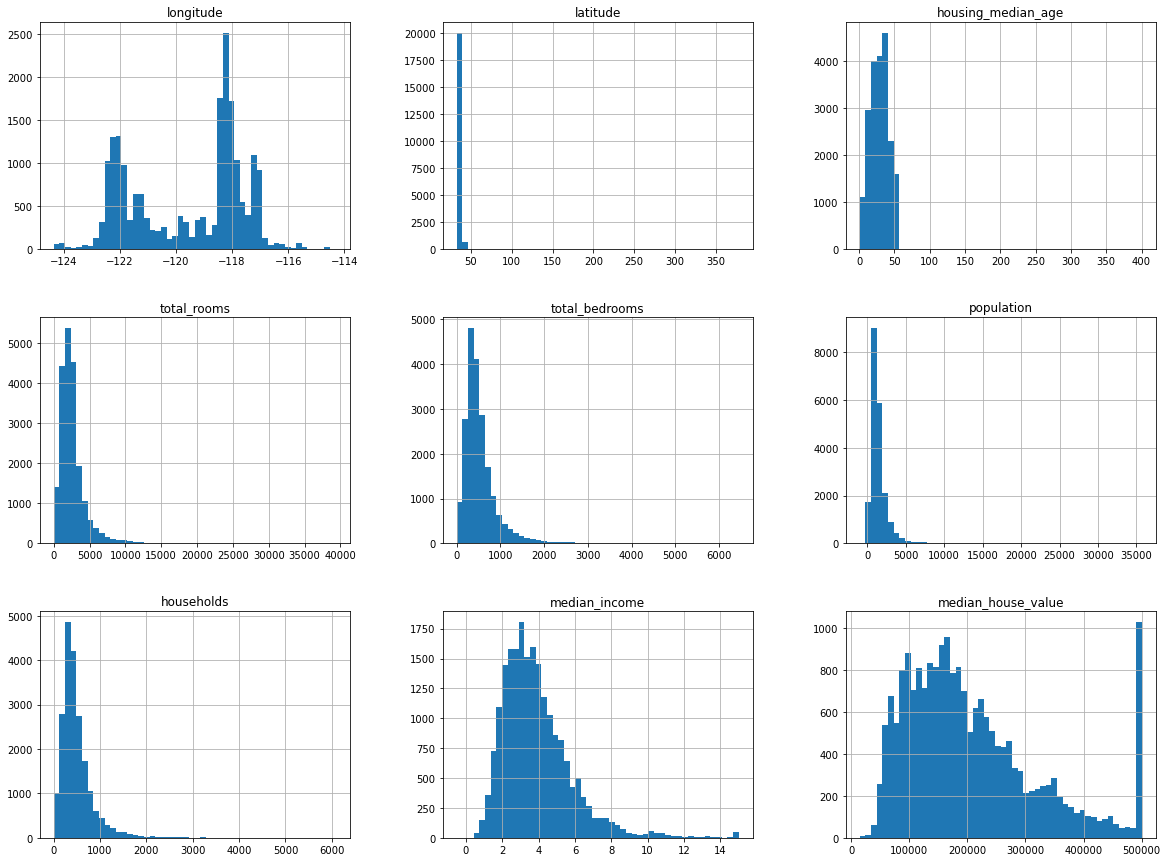

In [18]:
california_prices_df.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
california_prices_df.iplot()

AttributeError: 'DataFrame' object has no attribute 'iplot'

california_prices_df.iplot() vs california_prices_df.plot()

## Insights from the histograms

1. Median income has obvioulsy been scaled down. The median is also capped at 15 for the very high median values and 0.5 for very low median income values. The scaling is by 10,000; i.e 3 means 30,000.
2. The median age and median house value have also been capped. For our machine learning model; it might raise the risk that house prices don't go beyond a certain level. 
3. the heavy tailed-ness (skewness to the left) needs to be normalized (it is harder to machine learning algorithms to detect patterns in non-normalized data)

#### Creating test

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_idx = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_idx = shuffled_idx[:test_set_size]
    train_idx = shuffled_idx[test_set_size:]
    return data.iloc[train_idx], data.iloc[test_idx]

In [ ]:
train_set, test_set = split_train_test(california_prices_df, 0.2)
len(train_set)

In [ ]:
# create a checkpoint
housing_df = california_prices_df.copy()
housing_df.isna().sum()

In [ ]:
housing_df.max().to_frame().T

In [ ]:
housing_df.min().to_frame().T

In [ ]:
housing_df["income_cat"] = pd.cut(housing_df["median_income"],
                                           bins=[0.,1.5,3.0, 4.5, 6., np.inf],
                                           labels=[1,2,3,4,5])
housing_df["income_cat"].hist()

# Data Visualization

In [ ]:
housing_df.plot(kind="scatter", x="longitude", y="latitude")

There is a menacingly very high value with a latitude of 378.0. For sure we cannot have a latitude of 378 degrees yet the north pole is 90 degrees latitude

In [ ]:
housing_df.loc[housing_df["latitude"] > 350]

In [ ]:
housing_df_cleaned_lat = housing_df.loc[housing_df['latitude'] < 70]

In [ ]:
housing_df_cleaned_lat.head()

In [ ]:
housing_df_cleaned_lat.plot(kind="scatter", x="longitude", y="latitude")

We can now see the California area from San Francisco all the way to San Diego. It looks as close the real map it self.
<img src="https://thumbs.dreamstime.com/z/map-state-california-10928694.jpg" width="600" height="200">

In [ ]:
# to be able to see the places with high prices
housing_df_cleaned_lat.plot(kind="scatter", x="longitude", y="latitude", alpha=.2)
plt.rcParams["figure.figsize"] = [12,9]

The more opaque the dots, the higher the opacity and number of dots around that area, the higher the house prices. We could add more information regarding the population that lives there using the population variable. 

In [ ]:
housing_df_cleaned_lat.plot(kind="scatter", x="longitude", y="latitude", alpha=.4,
                           s=housing_df_cleaned_lat["population"]/100, label="population", figsize=(15,8),
                           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

## Looking for correlations among variables

One of the key concepts in statistics is getting to know whether a variable is inversely proportional or directly proportional to another variable as this affects the machine learning algorithm we are depending upon. 

If there are patterns  that already exist in the dataset: this will likely lead to poor learning by the algorithm; a problem called multicollinearity. But multicollinearity is much more complicated than variables having direct association/relationship between them and we shall cover it slowly.

In [ ]:
corr_matrix = housing_df_cleaned_lat.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

As a rule of thumb, we wouldn't want the correlations to be strong (values approaching 1). Values approaching -1 means that they are negatively correlated. Another thing to note is that:

**Correlation measures on linear relationships, we might miss out on non-linear relationships.**

#### Some data Quirks

1. Some of the variables have heavy tailedness. We might want to logarithm transform them.

2. The total number of rooms in an area isn't that useful if we don't know the households there are. We would want the number of rooms per household. 

3. The same with number of bedrooms in a district, it would be beneficial if we compare the number of bedrooms to the number of rooms. 

4. We can do the same with population.

In [ ]:
# create a new checkpoint

housing_df_rooms_pop = housing_df_cleaned_lat.copy()

In [ ]:
housing_df_rooms_pop["rooms_per_household"] = housing_df_rooms_pop["total_rooms"]/housing_df_rooms_pop["households"]
housing_df_rooms_pop["bedrooms_per_room"] = housing_df_rooms_pop["total_bedrooms"]/housing_df_rooms_pop["total_rooms"]
housing_df_rooms_pop["pop_per_household"] = housing_df_rooms_pop["population"]/housing_df_rooms_pop["households"]

# our new df
housing_df_rooms_pop.head()


In [ ]:
# new correlation
corr_matrix =  housing_df_rooms_pop.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

The new values tend to have no direct relationships with the median_house_value which is a good thing.

====================================================================

Houses with lower number of bedrooms in every room tend to be less expensive. 


## Categorical data encoding

Most machine learning algorithms prefer numbers instead of categories in text. We could convert the <code>housing_df_rooms_pop["ocean_proximity"]</code> to categorical outcomes.

In [ ]:
california_df_cat = housing_df_rooms_pop[["ocean_proximity"]]
california_df_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

california_df_cat_encoded = ordinal_encoder.fit_transform(california_df_cat)
california_df_cat_encoded[:10]

In [ ]:
# we can get the categories 

ordinal_encoder.categories_

The method using above works well for ordinal categorical variables which in our case is not. A second better approach is the one-hot encoding method.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
california_df_cat_1hot = cat_encoder.fit_transform(california_df_cat)
california_df_cat_1hot

* A sparse matrix only stores the location of non-zero elements, thus not (wasting space) like the np matrix array.

In [ ]:
# just using the pd.get_dummies method is much simple

housing_df_1hot = pd.get_dummies(housing_df_rooms_pop, columns=['ocean_proximity'])
housing_df_1hot.head()

## Feature scaling

We shall be using standardization in this case. 

In standardization, values are centered around the mean with a unit standard deviation. In standardization, values are not restricted to a particular range. I have used standardization since for a value such a population, we have very large values which still count since the number of households are also many in such a region. Restricting the population will not truly show how it affects the households.

In [ ]:
housing_df_1hot.columns.values

In [ ]:
# create a copy of the data first
housing_stdscaled = housing_df_1hot.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household',
       'bedrooms_per_room', 'pop_per_household']

# create a copy of the data first

# for col in data which are numeric
# scale the column and transform that column
for col in num_cols:
    
    scaler = StandardScaler().fit(housing_stdscaled[[col]])

    #     transform 
    housing_stdscaled[col] = scaler.transform(housing_stdscaled[[col]])

In [ ]:
housing_stdscaled.head()

In [ ]:
#  The best way to split the data is obviously using the scikit method
# - startification of samples
# - randomization, shuffling and maintaining a constant test sample everytime


from sklearn.model_selection import train_test_split

X = housing_stdscaled.drop(['median_house_value', 'income_cat'], axis=1)
y = housing_stdscaled['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state = 42)
X_train[:5]

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# we now have a working linear regression model

In [ ]:
some_data = X_train[:5]
some_labels = y_train[:5]
print("Predictions:", lin_reg.predict(some_data))

In [ ]:
print("Labels: ", list(some_labels))

It works, but. some predictions are abit too far. Let's measure the root mean squared error which is the square root of the MSE. 

The MSE is the mean squared error.

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_train)

lin_reg_mse = mean_squared_error(y_train, housing_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

The rmse is quite high. It says that the typical error in the price or the price error would be <code>68452.48</code>. This isn't so good.

### Trying out Cross-validation

In CV, we randomly split the train set into 10 distinct subsets-folds and trains the model 10 times picking a different fold each time and train on the other 9 folds.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores_cv = np.sqrt(-scores)

In [ ]:
def print_scores(scores):
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Standard Deviation :", scores.std())
    
print_scores(lin_rmse_scores_cv)

The Cv method is even worse.

## The Grid Search and Random Search

before we can embark on some regularization techniques, let us try out these methods.

In [ ]:
from scipy.stats import loguniform
from  sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

# define search space

space = dict()
space["solver"] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [ ]:
# define evaluation
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# search = RandomizedSearchCV(LinearRegression(), space, n_iter=1000, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state = 42)
# # execute search
# result = search.fit(X_train, y_train)

# we shall have to use ridge regression for the regularization which